In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

In [2]:
import numpy as np
import torch
from torchvision import transforms as t, datasets as d

from src.costs import *
from src.distributions import *
from src.loggers import WandbLogger
from src.models.unet import unet_h
from src.plotters import ImagePlotter
from src.train import run_experiment
from src.utils import *
from src.models.resnet2 import ResNet_D, weights_init_D
import torch.optim as o
import torch.optim.lr_scheduler as lr

In [3]:
np.random.seed(0);
torch.manual_seed(0);

In [11]:
logger = WandbLogger(
    project="optimal-transport",
    entity="_devourer_",
    group="test",
    # mode="offline",
)

plotter = ImagePlotter(n_images=5,
                       n_samples=5,
                       plot_source=True)

config = dict(
    num_epochs=2000,
    num_samples=64,
    optimizer=o.Adam,
    optimizer_params=dict(
        lr=2e-5
    ),
    # scheduler_params=dict(
    #     type=lr.CyclicLR,
    #     params=dict(
    #         base_lr=1e-4,
    #         max_lr=1e-2,
    #         mode="triangular"
    #     )
    # ),
)

DEVICE = torch.device("cpu")

if torch.cuda.is_available():
    torch.cuda.set_device(2)
    DEVICE = torch.device("cuda")
print(DEVICE)

cuda


In [5]:
features, classes = load_dataset(
    d.FashionMNIST,
    root="../data/",
    transform=t.Compose([t.Resize(32), t.ToTensor()]))
source = TensorDatasetDistribution(features, classes, device=DEVICE)
features, classes = load_dataset(
    d.MNIST, root="../data/", transform=t.Compose([t.Resize(32), t.ToTensor()]))
target = TensorDatasetDistribution(features, classes, device=DEVICE)

p, q = source.event_shape, target.event_shape

  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/60000 [00:00<?, ?it/s]

In [7]:
critic = ResNet_D(size=32, nc=1).to(DEVICE).apply(weights_init_D)
mover = nn.Sequential(unet_h(source.event_shape, base_channels=48), nn.Tanh()).to(DEVICE)

In [12]:
run_experiment(
    source, target, *copy_models(mover, critic),
    cost=InnerGW(p, q, device=DEVICE),
    plotter=plotter,
    logger=logger,
    **config
)

Epoch:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/50 [00:00<?, ?it/s]

Validating:   0%|          | 0/50 [00:00<?, ?it/s]

wandb: Currently logged in as: _devourer_. Use `wandb login --relogin` to force relogin


Output()

In [ ]:
run_experiment(
    source, target, *copy_models(mover, critic),
    cost=InnerGW_conv(device=DEVICE),
    num_steps_cost=5,
    plotter=plotter,
    logger=logger,
    **config
)

In [21]:
shoes = load_h5py("../data/shoes_64.hdf5",
                  transform=t.Compose([
                      t.ToTensor(),
#                       t.Normalize(mean=[0.485, 0.456, 0.406],
#                                   std=[0.229, 0.224, 0.225]),
                      t.Resize(32),
                  ]))
handbags = load_h5py("../data/handbag_64.hdf5",
                     transform=t.Compose([
                         t.ToTensor(),
#                          t.Normalize(mean=[0.485, 0.456, 0.406],
#                                      std=[0.229, 0.224, 0.225]),
                         t.Resize(32),
                     ]))

source = TensorDatasetDistribution(handbags, torch.zeros(handbags.size(0)), device=DEVICE)
target = TensorDatasetDistribution(shoes, torch.zeros(shoes.size(0)), device=DEVICE)
p, q = source.event_shape, target.event_shape

In [22]:
critic = ResNet_D(size=32, nc=3).to(DEVICE).apply(weights_init_D)
mover = nn.Sequential(unet_h(source.event_shape, base_channels=48), nn.Tanh()).to(DEVICE)

Output()

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceed

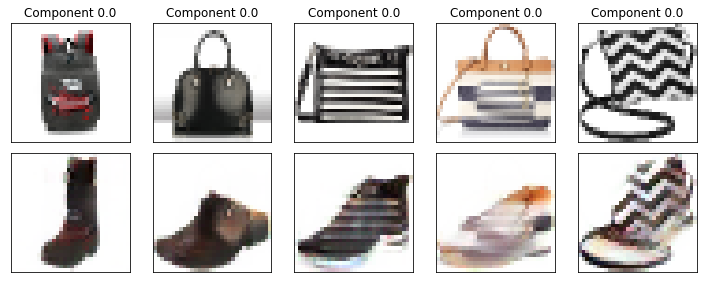

cost,█▃▂▁▁▂▂▃▂▃▃▄▂▃▁▃▃▄▄▃▂▄▄▁▁▃▂▃▃▂▃▂▃▂▃▃▂▃▂▃
critic(h_x),█▅▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
critic(y),█▅▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,▁▆▇▆▇▆▇█▇▇█▇▇▇▇▇███▇▇▇█▇▇█▇▇█▇▇▇█▇▇▇███▇
cost,0.00329
critic(h_x),0.00559
critic(y),0.00578
loss,0.00348


In [27]:
run_experiment(
    source, target, *copy_models(mover, critic),
    cost=InnerGW_conv(device=DEVICE),
    plotter=plotter,
    logger=logger,
    num_steps_cost=5,
    **config
)